## Project Outline:
- Scraping: I am going to scrape Nykaa Fashion https://www.nykaafashion.com/women/indianwear/c/4 and get a list of products and its details.
-  CSV Creation: I will create a csv file in the following format:

Brand Name, Product Name, Product Price, MRP (Original Price), Discount, Product Link

W,Pink Floral Printed Top & Flared Pant Co-ord (Set of 2),"₹2,600","₹3,999",35%,https://www.nykaafashion.com/w-pink-floral-printed-top-flared-pant-co-ord/p/11364334

- Exploratory Data Analysis (EDA): After scraping I am going to perform Exploratory Data Analysis on the gathered data.


## Using the requests library to download the web page


In [101]:
import requests

In [102]:
URL = 'https://www.nykaafashion.com/women/indianwear/c/4?p=1'

In [103]:
response = requests.get(URL)

In [104]:
response.status_code

# It response status codes if the specific http request has been completed successfully
# successful response (200 - 299)

200

In [105]:
len(response.text)

921703

In [106]:
page_contents = response.content

In [107]:
page_contents[:200]

b'<!doctype html><html lang="en" data-reactroot=""><head><meta charSet="utf-8" /><meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1" /><link rel="manifest" href="/manife'

In [108]:
with open('webpage.html', 'w', encoding='utf-8') as f:
    f.write(page_contents.decode('utf-8'))

## Using Beautiful Soup to parse and extract information

In [109]:
from bs4 import BeautifulSoup

In [110]:
soup = BeautifulSoup(page_contents, 'html.parser')

In [111]:
x = soup.find_all("div", class_='css-ham81y')

In [112]:
x[:5]

[<div class="css-ham81y" data-at="product-title">Biba</div>,
 <div class="css-ham81y" data-at="product-title">Likha by Nykaa Fashion</div>,
 <div class="css-ham81y" data-at="product-title">Gajra Gang by Nykaa Fashion</div>,
 <div class="css-ham81y" data-at="product-title">Nyri</div>,
 <div class="css-ham81y" data-at="product-title">Seher Jaipur</div>]

In [113]:
len(x)

48

- It seems like only 48 products have been updated. But as per the website's details there are total of 112,087 items.
- In the websites URL https://www.nykaafashion.com/women/indianwear/c/4?p=1, you can notice at the end it says p=1 which means it is producing results only for 1 page.
- There might be many pages in the website but there is no proper page numbers mentioned at the end of the page.
- So I am going to extract all the products details upto the page 200.

In [114]:
for i in range(1, 201):
    page_url = 'https://www.nykaafashion.com/women/indianwear/c/4?p='+str(i)
    print(page_url)

https://www.nykaafashion.com/women/indianwear/c/4?p=1
https://www.nykaafashion.com/women/indianwear/c/4?p=2
https://www.nykaafashion.com/women/indianwear/c/4?p=3
https://www.nykaafashion.com/women/indianwear/c/4?p=4
https://www.nykaafashion.com/women/indianwear/c/4?p=5
https://www.nykaafashion.com/women/indianwear/c/4?p=6
https://www.nykaafashion.com/women/indianwear/c/4?p=7
https://www.nykaafashion.com/women/indianwear/c/4?p=8
https://www.nykaafashion.com/women/indianwear/c/4?p=9
https://www.nykaafashion.com/women/indianwear/c/4?p=10
https://www.nykaafashion.com/women/indianwear/c/4?p=11
https://www.nykaafashion.com/women/indianwear/c/4?p=12
https://www.nykaafashion.com/women/indianwear/c/4?p=13
https://www.nykaafashion.com/women/indianwear/c/4?p=14
https://www.nykaafashion.com/women/indianwear/c/4?p=15
https://www.nykaafashion.com/women/indianwear/c/4?p=16
https://www.nykaafashion.com/women/indianwear/c/4?p=17
https://www.nykaafashion.com/women/indianwear/c/4?p=18
https://www.nykaafa

In [115]:
brand_names = []
product_names = []
product_prices = []
available_sizes = []
original_prices = []
discounts = []
product_links = []

for i in range(1, 201):
    page_url = 'https://www.nykaafashion.com/women/indianwear/c/4?p=' + str(i)
    
    response = requests.get(page_url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    products = soup.find_all("a", class_="css-1t10dtm")
    
    for product in products:
        brand_name = product.find("div", class_="css-ham81y").text.strip()
        product_name = product.find("div", class_="css-8ncoj4").text.strip()
        product_price = product.find("span", class_="css-1ijk06y").text.strip()
        
        #checking if the element exists before accessing its text
        original_price_element = product.find("span", class_="css-1vhnk55")
        original_price = original_price_element.text.strip() if original_price_element else ""
        
        discount_element = product.find("span", class_="css-q6csrj")
        discount = discount_element.text.strip() if discount_element else ""
        
        link = product.get("href")
        if link:
            product_link = f"https://www.nykaafashion.com{link}"
        else:
            product_link = 'N/A'
        
        brand_names.append(brand_name)
        product_names.append(product_name)
        product_prices.append(product_price)
        original_prices.append(original_price)
        discounts.append(discount)
        product_links.append(product_link)
        
# Printing the scraped data
for i in range(len(brand_names)):
    print("Brand Name:", brand_names[i])
    print("Product Name:", product_names[i])
    print("Product Price:", product_prices[i])
    print("Original Price:", original_prices[i])
    print("Discount:", discounts[i])
    print("Product Link:", product_links[i])
    print("-----------------------")

Brand Name: Biba
Product Name: Off White Cotton Straight Yarndyed Kurta (Set of 3)
Product Price: ₹2,000
Original Price: ₹3,999
Discount: 50%
Product Link: https://www.nykaafashion.com/biba-off-white-cotton-straight-yarndyed-kurta-set-of-3/p/10184692
-----------------------
Brand Name: Likha by Nykaa Fashion
Product Name: Blue Polka Dot Printed Cotton Flex Co-ord (Set of 2)
Product Price: ₹2,400
Original Price: ₹2,999
Discount: 20%
Product Link: https://www.nykaafashion.com/likha-by-nykaa-fashion-blue-polka-dot-printed-cotton-flex-co-ord-set-of-2/p/11107176
-----------------------
Brand Name: Gajra Gang by Nykaa Fashion
Product Name: Glitterati Fuchsia Soft and Flowy Two-Toned Saree
Product Price: ₹2,250
Original Price: ₹2,499
Discount: 10%
Product Link: https://www.nykaafashion.com/gajra-gang-by-nykaa-fashion-vintage-rani-pink-two-toned-saree/p/8410583
-----------------------
Brand Name: Nyri
Product Name: Navy Blue Raw Silk Woven Zari Festive Stone Butta with Border Saree and Unstitc

In [116]:
data = {
    "Brand Name": brand_names,
    "Product Name": product_names,
    "Product Price": product_prices,
    "Original Price": original_prices,
    "Discount": discounts,
    "Product Link": product_links
}


In [117]:
import pandas as pd
df = pd.DataFrame(data)

In [297]:
df.head()

,Brand Name,Product Name,Product Price,Original Price,Discount,Product Link
0,Biba,Off White Cotton Straight Yarndyed Kurta (Set ...,"₹2,000","₹3,999",50%,https://www.nykaafashion.com/biba-off-white-co...
1,Likha by Nykaa Fashion,Blue Polka Dot Printed Cotton Flex Co-ord (Set...,"₹2,400","₹2,999",20%,https://www.nykaafashion.com/likha-by-nykaa-fa...
2,Gajra Gang by Nykaa Fashion,Glitterati Fuchsia Soft and Flowy Two-Toned Saree,"₹2,250","₹2,499",10%,https://www.nykaafashion.com/gajra-gang-by-nyk...
3,Nyri,Navy Blue Raw Silk Woven Zari Festive Stone Bu...,"₹3,220","₹4,599",30%,https://www.nykaafashion.com/nyri-navy-blue-ra...
4,Seher Jaipur,Pink Ayat Kurta with Pant and Dupatta (Set of 3),"₹6,800",,,https://www.nykaafashion.com/seher-jaipur-pink...


In [298]:
df.tail()

,Brand Name,Product Name,Product Price,Original Price,Discount,Product Link
5261,Akhilam,Womens Silk Blend Mauve Embellished Designer S...,"₹2,868","₹7,749",63%,https://www.nykaafashion.com/akhilam-womens-si...
5262,Gillori,Shyamal Sharara with Dupatta (Set of 3),"₹3,135","₹3,299",5%,https://www.nykaafashion.com/gillori-shyamal-s...
5263,Fabindia,Blue Cotton Printed Knee Length Kurta,"₹2,299",,,https://www.nykaafashion.com/fabindia-blue-cot...
5264,Indibelle,Cotton Sea Green Lurex Floral Print Straight K...,₹735,"₹2,099",65%,https://www.nykaafashion.com/indibelle-cotton-...
5265,The Svaya,Ivory Silk Straight Kurta Pants and Dupatta (S...,"₹4,365","₹4,849",10%,https://www.nykaafashion.com/the-svaya-ivory-s...


## Creating CSV file with the extracted information

In [119]:
df.to_csv("nykaa_fashion_indianwear.csv", index= None)

## Performing Exploratory Data Analysis(EDA)

#### Importing the libraries

In [295]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [266]:
pd_data = pd.read_csv("nykaa_fashion_indianwear.csv")

In [267]:
#copying the csv data to a variable to not affect the original data 
df_copy = pd_data.copy()

#### Finding if there are any Null values.

In [268]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5266 entries, 0 to 5265
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Brand Name      5266 non-null   object
 1   Product Name    5266 non-null   object
 2   Product Price   5266 non-null   object
 3   Original Price  4683 non-null   object
 4   Discount        4683 non-null   object
 5   Product Link    5266 non-null   object
dtypes: object(6)
memory usage: 247.0+ KB


In [269]:
df_copy.isnull().sum()

Brand Name          0
Product Name        0
Product Price       0
Original Price    583
Discount          583
Product Link        0
dtype: int64

<AxesSubplot:>

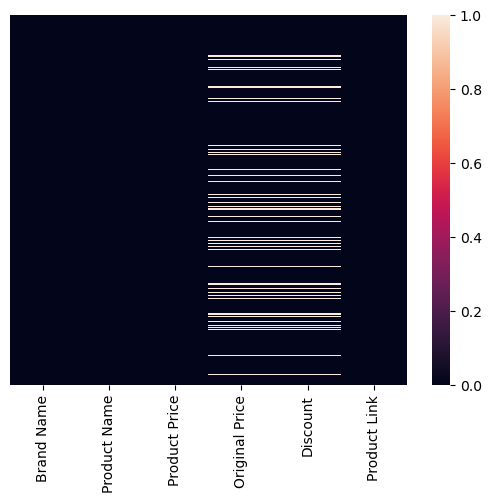

In [270]:
sns.heatmap(df_copy.isnull(),yticklabels=False)

In [271]:
df_copy.head()

,Brand Name,Product Name,Product Price,Original Price,Discount,Product Link
0,Biba,Off White Cotton Straight Yarndyed Kurta (Set ...,"₹2,000","₹3,999",50%,https://www.nykaafashion.com/biba-off-white-co...
1,Likha by Nykaa Fashion,Blue Polka Dot Printed Cotton Flex Co-ord (Set...,"₹2,400","₹2,999",20%,https://www.nykaafashion.com/likha-by-nykaa-fa...
2,Gajra Gang by Nykaa Fashion,Glitterati Fuchsia Soft and Flowy Two-Toned Saree,"₹2,250","₹2,499",10%,https://www.nykaafashion.com/gajra-gang-by-nyk...
3,Nyri,Navy Blue Raw Silk Woven Zari Festive Stone Bu...,"₹3,220","₹4,599",30%,https://www.nykaafashion.com/nyri-navy-blue-ra...
4,Seher Jaipur,Pink Ayat Kurta with Pant and Dupatta (Set of 3),"₹6,800",NaN,NaN,https://www.nykaafashion.com/seher-jaipur-pink...


In [272]:
df_copy.describe()

,Brand Name,Product Name,Product Price,Original Price,Discount,Product Link
count,5266,5266,5266,4683,4683,5266
unique,288,5118,1620,868,81,5266
top,W,Green Solid Kurta,"₹2,000","₹3,999",50%,https://www.nykaafashion.com/biba-off-white-co...
freq,237,6,64,174,608,1


In [273]:
sum(df_copy.duplicated())

0

In [274]:
df_copy.dtypes

Brand Name        object
Product Name      object
Product Price     object
Original Price    object
Discount          object
Product Link      object
dtype: object

#### Removing the "₹" symbol from the columns and changing its data type by filling the null values with -1.

In [275]:
df_copy["Product Price"] = df_copy["Product Price"].replace("[^0-9]", "", regex=True).astype(int)

In [276]:
df_copy["Original Price"] = df_copy["Original Price"].fillna(-1)
df_copy["Original Price"] = df_copy["Original Price"].replace("[^0-9]", "", regex=True).astype(int)

In [277]:
df_copy["Discount"] = df_copy["Discount"].fillna(-1)
df_copy["Discount"] = df_copy["Discount"].replace("[^0-9]", "", regex=True).astype(int)

In [278]:
df_copy["Discount Amount"] = round((df_copy["Original Price"] * df_copy["Discount"]) / 100).astype(int)

In [279]:
df_copy.head()

,Brand Name,Product Name,Product Price,Original Price,Discount,Product Link,Discount Amount
0,Biba,Off White Cotton Straight Yarndyed Kurta (Set ...,2000,3999,50,https://www.nykaafashion.com/biba-off-white-co...,2000
1,Likha by Nykaa Fashion,Blue Polka Dot Printed Cotton Flex Co-ord (Set...,2400,2999,20,https://www.nykaafashion.com/likha-by-nykaa-fa...,600
2,Gajra Gang by Nykaa Fashion,Glitterati Fuchsia Soft and Flowy Two-Toned Saree,2250,2499,10,https://www.nykaafashion.com/gajra-gang-by-nyk...,250
3,Nyri,Navy Blue Raw Silk Woven Zari Festive Stone Bu...,3220,4599,30,https://www.nykaafashion.com/nyri-navy-blue-ra...,1380
4,Seher Jaipur,Pink Ayat Kurta with Pant and Dupatta (Set of 3),6800,-1,-1,https://www.nykaafashion.com/seher-jaipur-pink...,0


In [280]:
df_copy.dtypes

Brand Name         object
Product Name       object
Product Price       int32
Original Price      int32
Discount            int32
Product Link       object
Discount Amount     int32
dtype: object

#### Replacing the -1 values in the Original price and Discount columns and 0 values in the Discount Amount column with Null values to prevent any errors in the further analysis.

In [282]:
df_copy["Original Price"] = df_copy["Original Price"].replace(-1,np.nan)

In [283]:
df_copy["Discount"] = df_copy["Discount"].replace(-1,np.nan)

In [284]:
df_copy["Discount Amount"] = df_copy["Discount Amount"].replace(0,np.nan)

In [285]:
df_copy.describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.85,.9,.95], include=[int,float])

,Product Price,Original Price,Discount,Discount Amount
count,5266.000000,4683.000000,4683.000000,4683.000000
mean,3514.599696,4758.735426,37.347854,1678.248986
std,6238.601322,3543.364049,21.855855,1613.719267
min,248.000000,399.000000,2.000000,27.000000
1%,499.000000,995.000000,5.000000,85.000000
10%,863.500000,1750.000000,5.000000,267.600000
20%,1199.000000,2299.000000,10.000000,455.000000
30%,1549.000000,2889.600000,20.000000,700.000000
40%,1950.000000,3399.000000,30.000000,990.800000
50%,2455.500000,3999.000000,40.000000,1259.000000


In [286]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5266 entries, 0 to 5265
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand Name       5266 non-null   object 
 1   Product Name     5266 non-null   object 
 2   Product Price    5266 non-null   int32  
 3   Original Price   4683 non-null   float64
 4   Discount         4683 non-null   float64
 5   Product Link     5266 non-null   object 
 6   Discount Amount  4683 non-null   float64
dtypes: float64(3), int32(1), object(3)
memory usage: 267.5+ KB


#### Finding the Top 10 Brand Names by its count.

In [287]:
df_copy["Brand Name"].value_counts()

W                         237
Biba                      195
Soch                      166
Juniper                   146
Likha by Nykaa Fashion    138
                         ... 
Zamour                      1
NEIZA                       1
Paislei                     1
Saras The Label             1
Harnaaz                     1
Name: Brand Name, Length: 288, dtype: int64

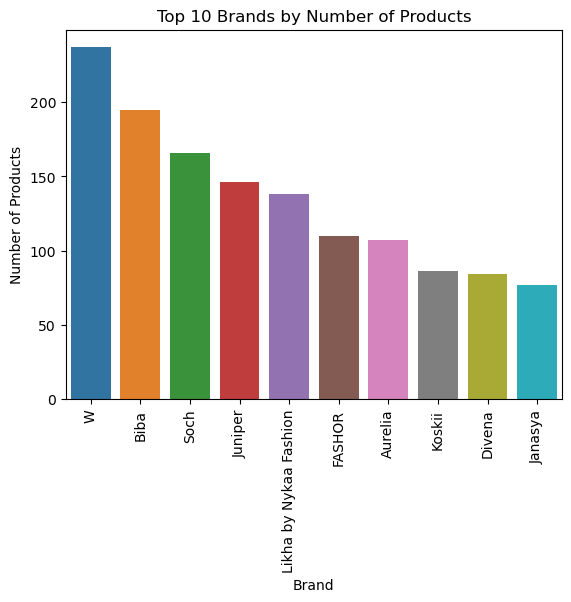

In [296]:
top_brands = df_copy['Brand Name'].value_counts().nlargest(10)
sns.barplot(x=top_brands.index, y=top_brands.values)
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.title('Top 10 Brands by Number of Products')
plt.xticks(rotation=90)
plt.show()

#### Distribution analysis: Distributions of "Product Price," "Original Price," "Discount," and "Discount Amount" using histograms.

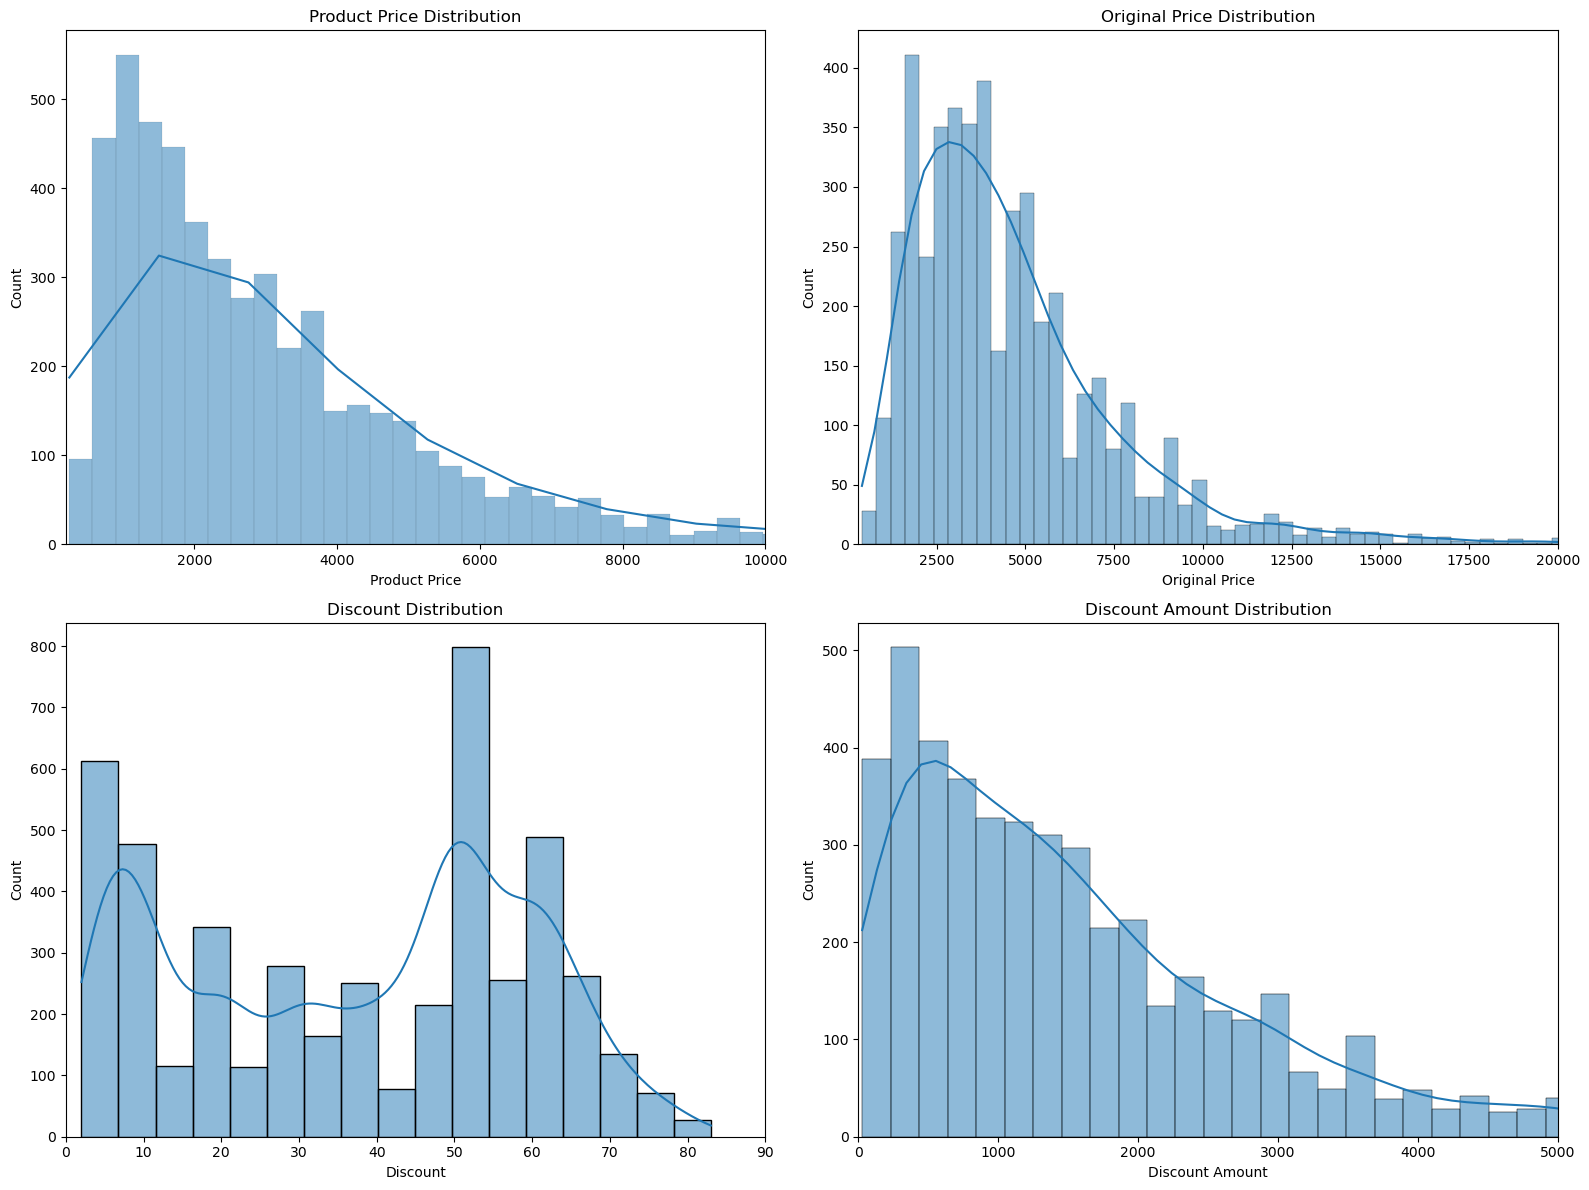

In [289]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.histplot(df_copy['Product Price'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Product Price Distribution')
axes[0, 0].set_xlim(200, 10000)

sns.histplot(df_copy['Original Price'], ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Original Price Distribution')
axes[0, 1].set_xlim(300, 20000)

sns.histplot(df_copy['Discount'], ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Discount Distribution')
axes[1, 0].set_xlim(0, 90)

sns.histplot(df_copy['Discount Amount'], ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Discount Amount Distribution')
axes[1, 1].set_xlim(0, 5000)

plt.tight_layout()

#### Product Price against Discount

Text(0.5, 1.0, 'Product Price vs. Discount')

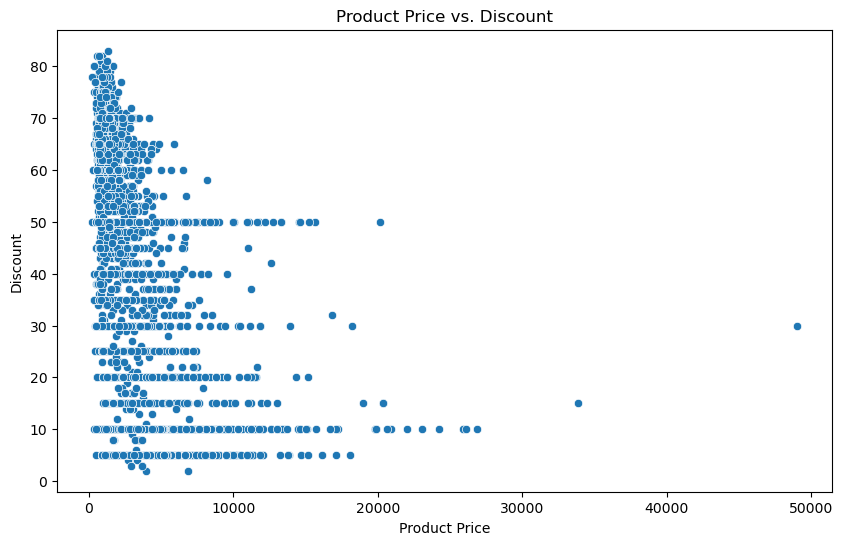

In [290]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy, x='Product Price', y='Discount')
plt.title('Product Price vs. Discount')

#### Top Three Brands with More Than 50% Discount.

(array([0, 1, 2]),
 [Text(0, 0, 'W'), Text(1, 0, 'FASHOR'), Text(2, 0, 'Juniper')])

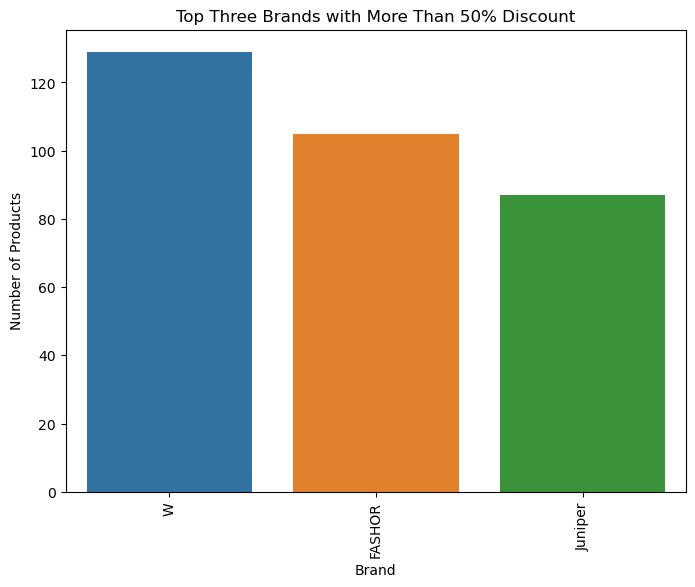

In [291]:
top_discounted_brands = df_copy[df_copy['Discount'] > 50]['Brand Name']

brand_counts = top_discounted_brands.value_counts()

top_three_brands = brand_counts.head(3)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_three_brands.index, y=top_three_brands.values)
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.title('Top Three Brands with More Than 50% Discount')
plt.xticks(rotation=90)

#### Top Brands with Product Prices greater than 10000.

Text(0.5, 1.0, 'Top Brands with Product Prices > 10000')

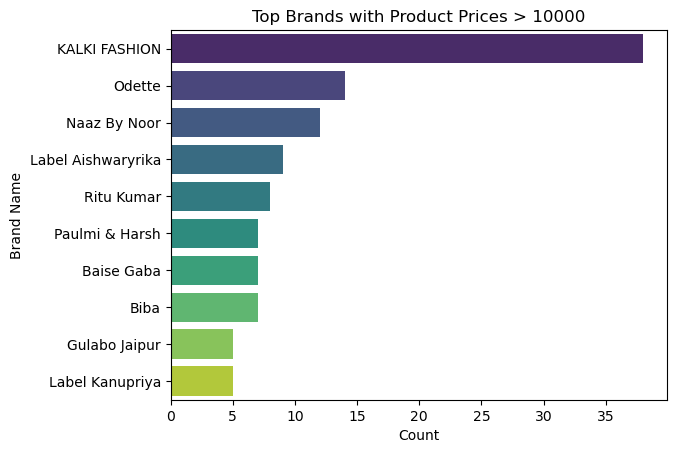

In [292]:
filtered_brands = df_copy[df_copy['Product Price'] > 10000]['Brand Name']

brand_counts = filtered_brands.value_counts().head(10)

sns.barplot(x=brand_counts.values, y=brand_counts.index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Brand Name')
plt.title('Top Brands with Product Prices > 10000')

#### Top Three Brands with More Than 50% Discount.

(array([0, 1, 2]),
 [Text(0, 0, 'W'), Text(1, 0, 'FASHOR'), Text(2, 0, 'Juniper')])

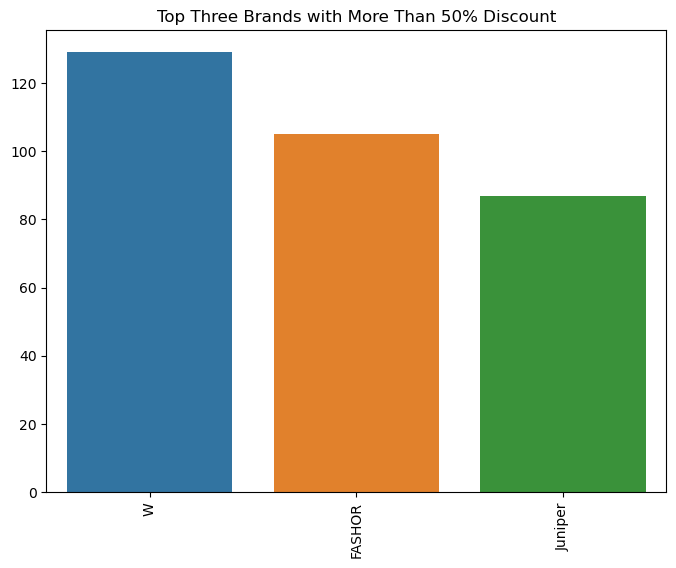

In [293]:
top_discounted_brands = df_copy[df_copy['Discount'] > 50]['Brand Name']

brand_counts = top_discounted_brands.value_counts()

top_three_brands = brand_counts.head(3)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_three_brands.index, y=top_three_brands.values)
plt.title('Top Three Brands with More Than 50% Discount')
plt.xticks(rotation=90)

#### Top 5 Brands with Highest Discount Amount.

Text(0.5, 1.0, 'Top 5 Brands with Highest Discount Amount')

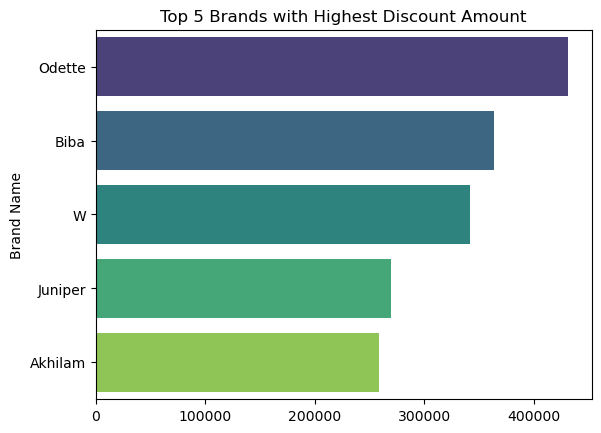

In [294]:
top_discount_brands = df_copy.groupby('Brand Name')['Discount Amount'].sum().nlargest(5)

sns.barplot(x=top_discount_brands.values, y=top_discount_brands.index, palette='viridis')
plt.title('Top 5 Brands with Highest Discount Amount')